In [266]:
import cv2
import os
import numpy as np
import pandas as pd

resize_width = 75
resize_height = 75

# Function for loading images with correct format, applying histogram equalization, and flattening
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            
            # Resize image
            img = cv2.resize(img, (resize_width, resize_height))
            
            # Apply histogram equalization
            img = cv2.equalizeHist(img)
            
            # Normalize image
            normalized_img = img.astype('float32') / 255.0
            
            # Flatten image
            flattened_img = normalized_img.flatten()
            
            images.append(flattened_img)
    labels = [label] * len(images)
    return images, labels

# Load and flatten closed heart images
closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'mask')

# Load and flatten open heart images
open_images, open_labels = load_and_flatten_images(open_heart_path, 'mask')

# Load and flatten non-heart images
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'nomask')

# Combine closed and open heart images and labels
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

# Convert heart images and labels into a DataFrame
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# Convert non-heart images and labels into a DataFrame
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# Display the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)


Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...      5616  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.141176   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.160784   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.200000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
213  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.235294   
214  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
216  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
217  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         5617      5618      5619      5620      5621      5622      5623  \
0    0.000000  0.000000  0.176471

In [267]:
import cv2
import matplotlib.pyplot as plt

def plot_images(images, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(15, 5))
    for i, img in enumerate(images):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Load images as grayscale
gray_heart_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in heart_images[:5]]
gray_abdominal_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in abdominal_images[:5]]

# Apply histogram equalization to grayscale heart images
heart_images_equalized = [cv2.equalizeHist(img) for img in gray_heart_images]
# Plot original and equalized heart images
plot_images(gray_heart_images, 'Original Heart Image')
plot_images(heart_images_equalized, 'Histogram Equalized Heart Image')

# Apply histogram equalization to grayscale abdominal images
abdominal_images_equalized = [cv2.equalizeHist(img) for img in gray_abdominal_images]
# Plot original and equalized abdominal images
plot_images(gray_abdominal_images, 'Original Abdominal Image')
plot_images(abdominal_images_equalized, 'Histogram Equalized Abdominal Image')


TypeError: Can't convert object to 'str' for 'filename'

Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...      5616  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.141176   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.160784   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.200000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
213  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.235294   
214  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
216  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
217  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         5617      5618      5619      5620      5621      5622      5623  \
0    0.000000  0.000000  0.176471

TypeError: Image data of dtype object cannot be converted to float

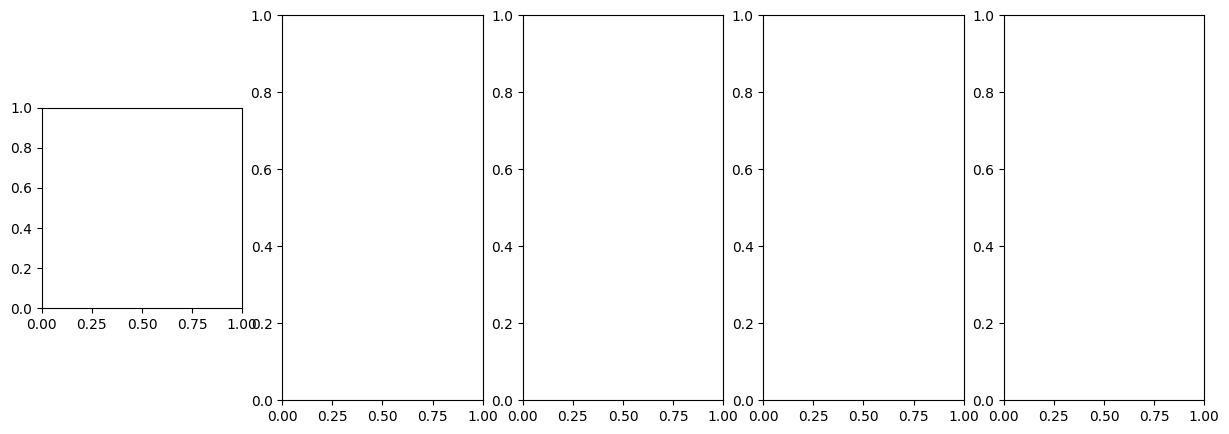

In [269]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

resize_width = 75
resize_height = 75

# Function for loading images with correct format, applying histogram equalization, and flattening
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            
            # Resize image
            img = cv2.resize(img, (resize_width, resize_height))
            
            # Apply histogram equalization
            img = cv2.equalizeHist(img)
            
            # Normalize image
            normalized_img = img.astype('float32') / 255.0
            
            # Flatten image
            flattened_img = normalized_img.flatten()
            
            images.append(flattened_img)
    labels = [label] * len(images)
    return images, labels

# Load and flatten closed heart images
closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'mask')

# Load and flatten open heart images
open_images, open_labels = load_and_flatten_images(open_heart_path, 'mask')

# Load and flatten non-heart images
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'nomask')

# Combine closed and open heart images and labels
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

# Convert heart images and labels into a DataFrame
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# Convert non-heart images and labels into a DataFrame
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# Display the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)

# Load images as grayscale
gray_heart_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in closed_heart_path[:5]]
gray_abdominal_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in non_heart_path[:5]]

# Apply histogram equalization to grayscale heart images
equalized_gray_heart_images = [cv2.equalizeHist(img) for img in gray_heart_images]

# Plot original and equalized grayscale heart images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(gray_heart_images[i], cmap='gray')
    axes[i].set_title('Original Heart Image')
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(equalized_gray_heart_images[i], cmap='gray')
    axes[i].set_title('Equalized Heart Image')
plt.show()


Heart Ultrasound Images:
       0    1    2    3    4    5    6    7    8    9  ...      5616  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.141176   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.160784   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.200000   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
213  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.235294   
214  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
215  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
216  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
217  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

         5617      5618      5619      5620      5621      5622      5623  \
0    0.000000  0.000000  0.176471

TypeError: Image data of dtype object cannot be converted to float

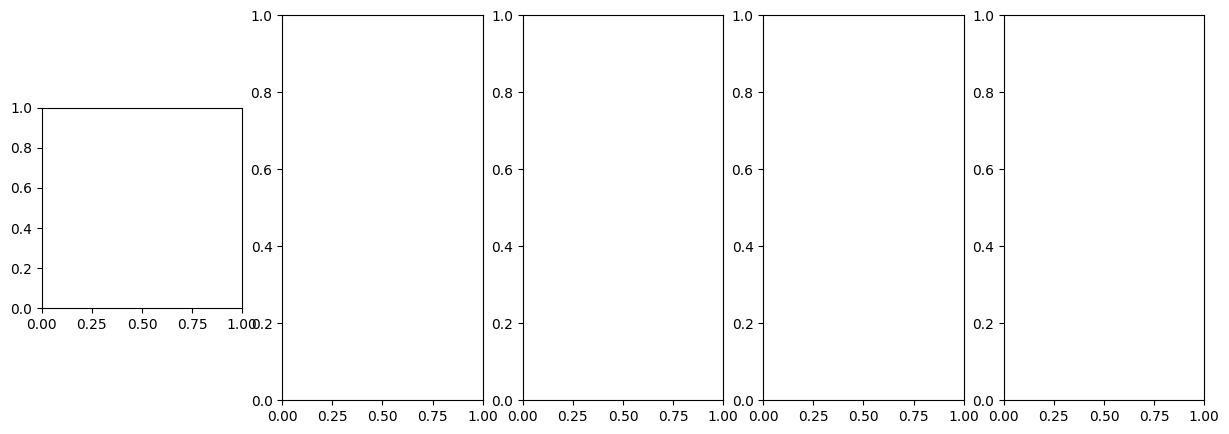

In [270]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

resize_width = 75
resize_height = 75

# Function for loading images with correct format, applying histogram equalization, and flattening
def load_and_flatten_images(directory, label, block_size=11, constant=2):
    images = []
    for file in os.listdir(directory):
        if file.endswith('.jpg') or file.endswith('.tiff'):
            img_path = os.path.join(directory, file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Unable to read image: {img_path}")
                    continue
                
                # Resize image
                img = cv2.resize(img, (resize_width, resize_height))
                
                # Apply histogram equalization
                img = cv2.equalizeHist(img)
                
                # Normalize image
                normalized_img = img.astype('float32') / 255.0
                
                # Flatten image
                flattened_img = normalized_img.flatten()
                
                images.append(flattened_img)
            except Exception as e:
                print(f"Error processing image {img_path}: {str(e)}")
                continue
            
    labels = [label] * len(images)
    return images, labels

# Load and flatten closed heart images
closed_images, closed_labels = load_and_flatten_images(closed_heart_path, 'mask')

# Load and flatten open heart images
open_images, open_labels = load_and_flatten_images(open_heart_path, 'mask')

# Load and flatten non-heart images
non_heart_images, non_heart_labels = load_and_flatten_images(non_heart_path, 'nomask')

# Combine closed and open heart images and labels
heart_images = np.concatenate([closed_images, open_images])
heart_labels = np.concatenate([closed_labels, open_labels])

# Convert heart images and labels into a DataFrame
heart_data = pd.DataFrame(heart_images)
heart_data['class'] = heart_labels

# Convert non-heart images and labels into a DataFrame
non_heart_data = pd.DataFrame(non_heart_images)
non_heart_data['class'] = non_heart_labels

# Display the data
print("Heart Ultrasound Images:")
print(heart_data)

print("\nNon-Heart Ultrasound Images:")
print(non_heart_data)

# Load images as grayscale
gray_heart_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in closed_heart_path[:5]]
gray_abdominal_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in non_heart_path[:5]]

# Apply histogram equalization to grayscale heart images
equalized_gray_heart_images = [cv2.equalizeHist(img) for img in gray_heart_images]

# Plot original and equalized grayscale heart images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(gray_heart_images[i], cmap='gray')
    axes[i].set_title('Original Heart Image')
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(equalized_gray_heart_images[i], cmap='gray')
    axes[i].set_title('Equalized Heart Image')
plt.show()
